In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv("../dataset/hipertensi.csv")
dfx = df
df = df.sample(frac = 1)

classColumn = "Blood_Pressure_Abnormality"

df.head()

,Age,BMI,Sex,Physical_activity,salt_content_in_the_diet,Level_of_Stress,Adrenal_and_thyroid_disorders,Blood_Pressure_Abnormality
1192,49,16,1,2,3,2,0,1
970,57,26,0,3,3,3,1,1
1954,21,50,0,2,3,1,1,0
1018,23,18,0,2,2,3,0,0
1176,45,39,1,1,1,3,1,1


In [19]:
df["Adrenal_and_thyroid_disorders"].unique()

array([0, 1], dtype=int64)

In [31]:
import tensorflow as tf


#dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

target = dfx.pop(classColumn)
X = dfx.values
y = target.values
print(dfx)

# Pemisahan data dengan 80% data pelatihan dan 20% data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konversi data menjadi TensorFlow Dataset 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1)

      Age  BMI  Sex  Physical_activity  salt_content_in_the_diet  \
0      34   23    1                  3                         3   
1      54   33    1                  2                         2   
2      70   49    0                  1                         2   
3      71   50    0                  1                         1   
4      52   19    0                  2                         3   
...   ...  ...  ...                ...                       ...   
1995   69   26    1                  2                         3   
1996   24   45    1                  1                         1   
1997   18   42    0                  2                         2   
1998   46   45    1                  2                         2   
1999   41   45    0                  2                         2   

      Level_of_Stress  Adrenal_and_thyroid_disorders  
0                   2                              1  
1                   3                              0  
2                 

In [32]:
n_features = dfx.shape[1]
#train_dataset = dataset.shuffle(len(df)).batch(1)
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, activation='relu', input_shape=(n_features,)),
    # tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=50)

Epoch 1/50
1600/1600 [==============================] - 8s 4ms/step - loss: 0.8245 - accuracy: 0.5156
Epoch 2/50
 958/1600 [================>.............] - ETA: 2s - loss: 0.7152 - accuracy: 0.4770

KeyboardInterrupt: 

In [ ]:
# dataNew = [[
#     0.2972973 , 1.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.                                                                             
# ]]
dataNew = X_test

dataNew = np.array(dataNew)

predictions = model.predict(dataNew)
print(predictions)
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)

13/13 [==============================] - 0s 2ms/step
[[0.37836447]
 [0.7040035 ]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.59467864]
 [0.65419316]
 [0.62894285]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.71918917]
 [0.37836447]
 [0.37836447]
 [0.6060572 ]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.6580631 ]
 [0.384968  ]
 [0.37836447]
 [0.625437  ]
 [0.43263796]
 [0.37836447]
 [0.6321614 ]
 [0.6054266 ]
 [0.37836447]
 [0.37836447]
 [0.66387165]
 [0.384038  ]
 [0.6981306 ]
 [0.62105775]
 [0.37836447]
 [0.62568456]
 [0.6810441 ]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.6619452 ]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.37836447]
 [0.5896111 ]
 [0.37836447]
 [0.6533827 ]
 [0.37836447]
 [0.5562968 ]
 [0.6725319 ]
 [0.5987811 ]
 [0.64776313]
 [0.60249954]
 [0.37836447]
 [0.58437586]
 [0.649354  ]
 [0.37836447]
 [0.7129358 ]
 [0.60211134]
 [0.37836447]
 [0.44854

Akurasi Model: 0.6625
Presisi Model: 0.625
Recall Model: 0.5932203389830508
F1-Score Model: 0.6086956521739131
AUC-ROC Score: 0.6735831369866484


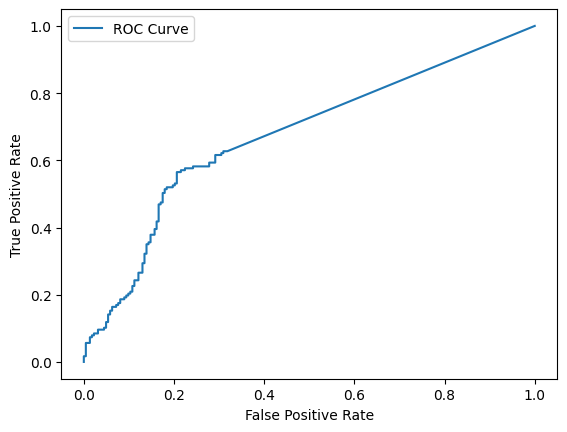

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Misalkan Anda telah melakukan prediksi pada data pengujian dan hasilnya disimpan dalam variabel binary_predictions

# Evaluasi dengan metrik akurasi
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Akurasi Model: {accuracy}')

# Evaluasi dengan metrik presisi (precision)
precision = precision_score(y_test, binary_predictions)
print(f'Presisi Model: {precision}')

# Evaluasi dengan metrik recall
recall = recall_score(y_test, binary_predictions)
print(f'Recall Model: {recall}')

# Evaluasi dengan metrik F1-score
f1 = f1_score(y_test, binary_predictions)
print(f'F1-Score Model: {f1}')

# Evaluasi dengan metrik AUC-ROC
roc_auc = roc_auc_score(y_test, predictions)
print(f'AUC-ROC Score: {roc_auc}')

# Plot kurva ROC (opsional)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


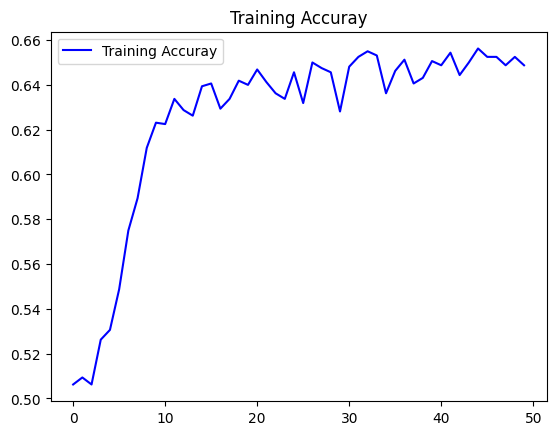

<Figure size 640x480 with 0 Axes>

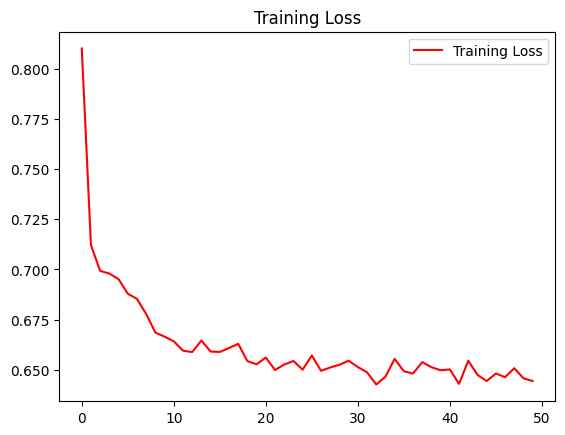

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, 'b', label='Training Accuray')
plt.title('Training Accuray')
plt.legend(loc=0)
plt.figure()
plt.show()

print("")

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()